<h3 align="center">H2O - Machine Learning at Scale</h3> 


### Program So far

- Basics of Python
- Descreptive and Inferential Statistics
- Linear Regression
- L1/L2 Regularization
- Basic data cleaning and Preprocessing
- Feature extraction and Feature engineering
- Feature selection
- Logistic Regression
- Decision trees
- Random Forests
- Boosting

_______________________
### Content

- Shortcommings of scikit-learn and pandas
- Techniques to perform Machine learning scale
- Introduction to H2O 
- Basic handling of data
- Hands on 

### Data Handled so far
- The data handled so far are very small and pandas could handle the frames. Pandas being a tool which loads data into RAM. This causes issues when we run out of RAM. 

- Use tools like Graphlab SFrames which handles data in a better way (Still has restrictions with the size of the data)
_______

### Sklearn and its shortcommings.
- sklearn performes computations with numeric variables 
- scikit-Learn has fantastic performance if your data fits into RAM. Python and Scikit-Learn do in-memory processing     and in a non-distributed fashion. For large datasets scaling becomes a major shortcoming

### What can one do in such cases? How can we tame our data and perform Machine learning in a distributed fashion?

- Hadoop
- Spark
- H2O
- H2O in combination with spark

___________________

### Hadoop

It has two main parts 
- a data processing framework
- a distributed filesystem for data storage. 

It has its own format HDFS (Hadoop Distributed File System)
#### A bit about MapReduce:
- MapReduce is the tool used to work with the data itself this is the tool used to process data and get the result       out.
- MapReduce runs as a series of jobs, with each job essentially a separate Java application that goes out into the       data and starts pulling out information as needed. Using MapReduce instead of a query gives data seekers a lot of     power and flexibility, but also adds a lot of complexity. Lets look at how the architecture looks



In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

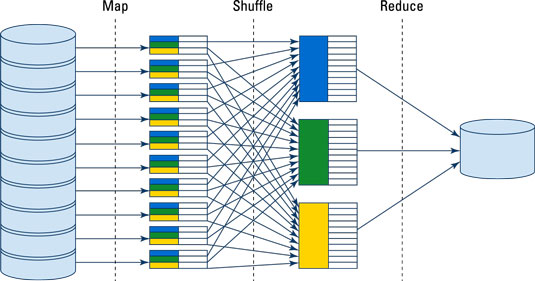

In [2]:
 Image(filename= '473708.image0.jpg')

### Spark !! what is it?
Spark is a open source frame work which allows us to handle batch and real time analytic and data processing. Tasks most frequently associated with Spark include interactive queries across large data sets, processing of streaming data from sensors or financial systems, and machine learning tasks.

- Spark streaming and processing: From log files to sensor data, application developers are increasingly having to cope with “streams” of data. This data arrives in a steady stream, often from multiple sources simultaneously. While it is certainly feasible to store these data streams on disk and analyze them retrospectively, it can sometimes be sensible or important to process and act upon the data as it arrives. Streams of data related to financial transactions, for example, can be processed in real time to identify—and refuse—potentially fraudulent transactions.

- Machine learning: As data volumes grow, machine learning approaches become more feasible and increasingly accurate. Software can be trained to identify and act upon triggers within well-understood data sets before applying the same solutions to new and unknown data. Spark’s ability to store data in memory and rapidly run repeated queries makes it a good choice for training machine learning algorithms. Running broadly similar queries again and again, at scale, significantly reduces the time required to go through a set of possible solutions in order to find the most efficient algorithms.

- Interactive streaming analytics: Rather than running pre-defined queries to create static dashboards of sales, production-line productivity, or stock prices, business analysts and data scientists want to explore their data by asking a question, viewing the result, and then either altering the initial question slightly or drilling deeper into results. This interactive query process requires systems such as Spark that are able to respond and adapt quickly.



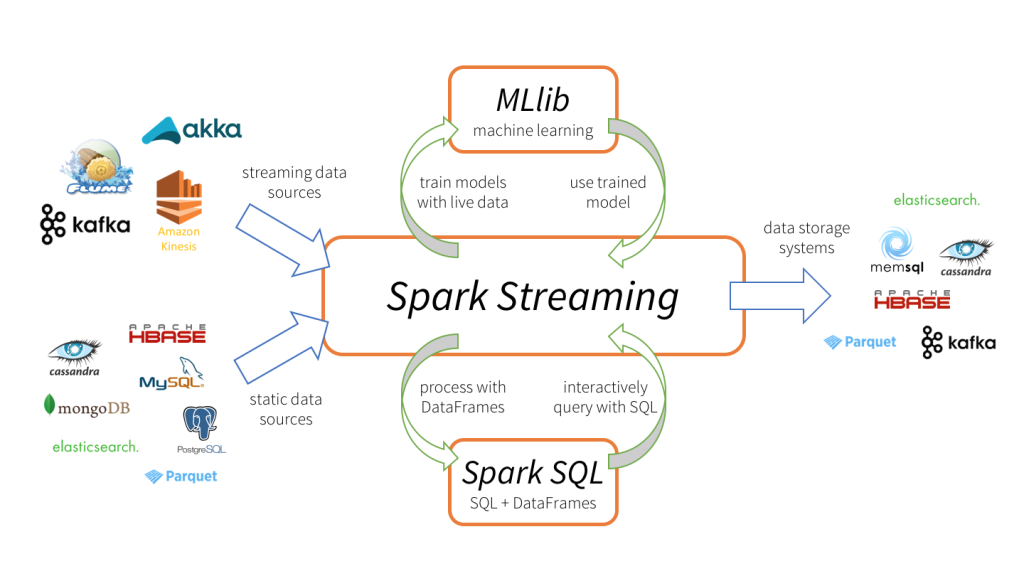

In [3]:
Image(filename='Apache-Spark-Streaming-ecosystem-diagram.png')

###  H2O

H2O is a powerful tool which is used to perform distributed machine learning at scale. The power of the tool comes from the easy implementation of deep learning models. 

- A Scalable Machine Learning Platform designed for big data with fully featured API's available on R, Python, Scala, and REST/JSON and also through a web interface. 

- Has a lot of similarity when compared to scikit-learn

- It has a easy to use interface for with ML algorithms implemented in Java

User is required to initialize the h2o which means we try to connect to a server if not successfull we start a new server and connect to it. So it is clear that the data is stored in a remote cluster and we access that cluster from our PC. 

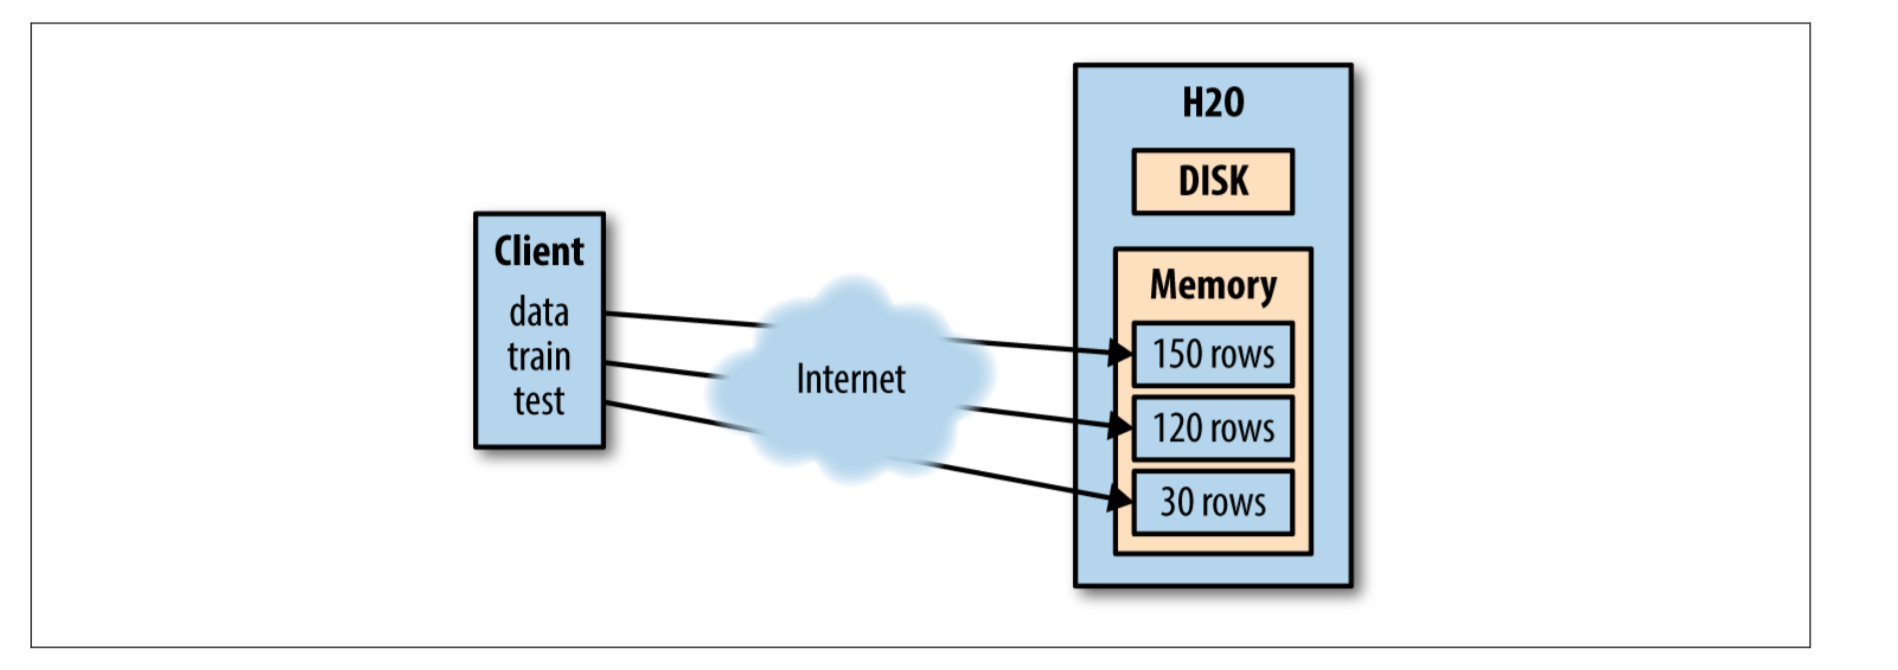

In [4]:
Image(filename='what_data_where.png')

In [5]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-macosx) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-macosx) (build 25.121-b15, mixed mode)
  Starting server from /Users/abhisheksubramanian/anaconda3/envs/py27/h2o_jar/h2o.jar
  Ice root: /var/folders/v8/8462q09j1f53fz27xyr192240000gn/T/tmp6nIp62
  JVM stdout: /var/folders/v8/8462q09j1f53fz27xyr192240000gn/T/tmp6nIp62/h2o_abhisheksubramanian_started_from_python.out
  JVM stderr: /var/folders/v8/8462q09j1f53fz27xyr192240000gn/T/tmp6nIp62/h2o_abhisheksubramanian_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster version:,3.10.0.9
H2O cluster version age:,11 months and 28 days !!!
H2O cluster name:,H2O_from_python_abhisheksubramanian_6k551x
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


#### Once we connect to a local cluster or a remote cluster after the initialization we can get information as shown above. 

- we can see how long the cluster has been running using the cluster uptime
- The free memory in the cluster 
- the name of the cluster and also the allowed cores and the total cores. (Point to remember is that the allowed cores need not be the total number of cores.)

- There is also a pointer to the work flow which we will come to later. 

- access to the python version we are using.



## Building our first model with H2O

John decides to start working on Large data sets and Machine learning at scale. He narrowed down the tool to use as H2O. How does he get started? Lets see what he does !!!!

In [6]:
data = h2o.import_file('h2o-bk/datasets/iris_wheader.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
data.head()

sepal_len,sepal_wid,petal_len,petal_wid,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
X = data.drop('class').names
Y = 'class'

In [9]:
train, test = data.split_frame([0.8])

In [10]:
len(test)

33

In [11]:
trainX, trainY = train[X], train[Y]
testX, testY  = test[X], test[Y]

In [12]:
type(trainX)

h2o.frame.H2OFrame

In [13]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [14]:
estimator = H2ODeepLearningEstimator()

In [15]:
estimator.train(X,Y,train)
h2o.save_model(estimator,path='estimator/',)


deeplearning Model Build progress: |██████████████████████████████████████| 100%


u'/Users/abhisheksubramanian/Documents/H2O/estimator/DeepLearning_model_python_1509447880443_1'

In [16]:
estimator.predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,0.999996,4.43516e-06,6.86758e-24
Iris-setosa,0.999972,2.78772e-05,1.37976e-22
Iris-setosa,0.999989,1.13176e-05,1.30875e-22
Iris-setosa,0.999876,0.000124088,1.2968e-21
Iris-setosa,0.999982,1.76177e-05,8.07074e-25
Iris-setosa,0.999977,2.31986e-05,1.21176e-22
Iris-setosa,0.999873,0.000127123,1.02784e-21
Iris-setosa,0.999997,2.51416e-06,4.64344e-23
Iris-setosa,0.999988,1.18462e-05,5.49273e-22
Iris-setosa,0.999955,4.52569e-05,2.18996e-22


### Learning point
Above is brief outline (not a strict one) of the building a model

1. Load the data
2. prepare the data
3. Build the model
4. Make predictions

In this case step 1 is the most important to understand. Whats so different? Here the point to understand is that all the data is on the cluster and not on the client. For example purposes the client and the cluster are the same. The take away is that whenever we want to build a model we have to load the data in the cluster. h2o.connect(IP)





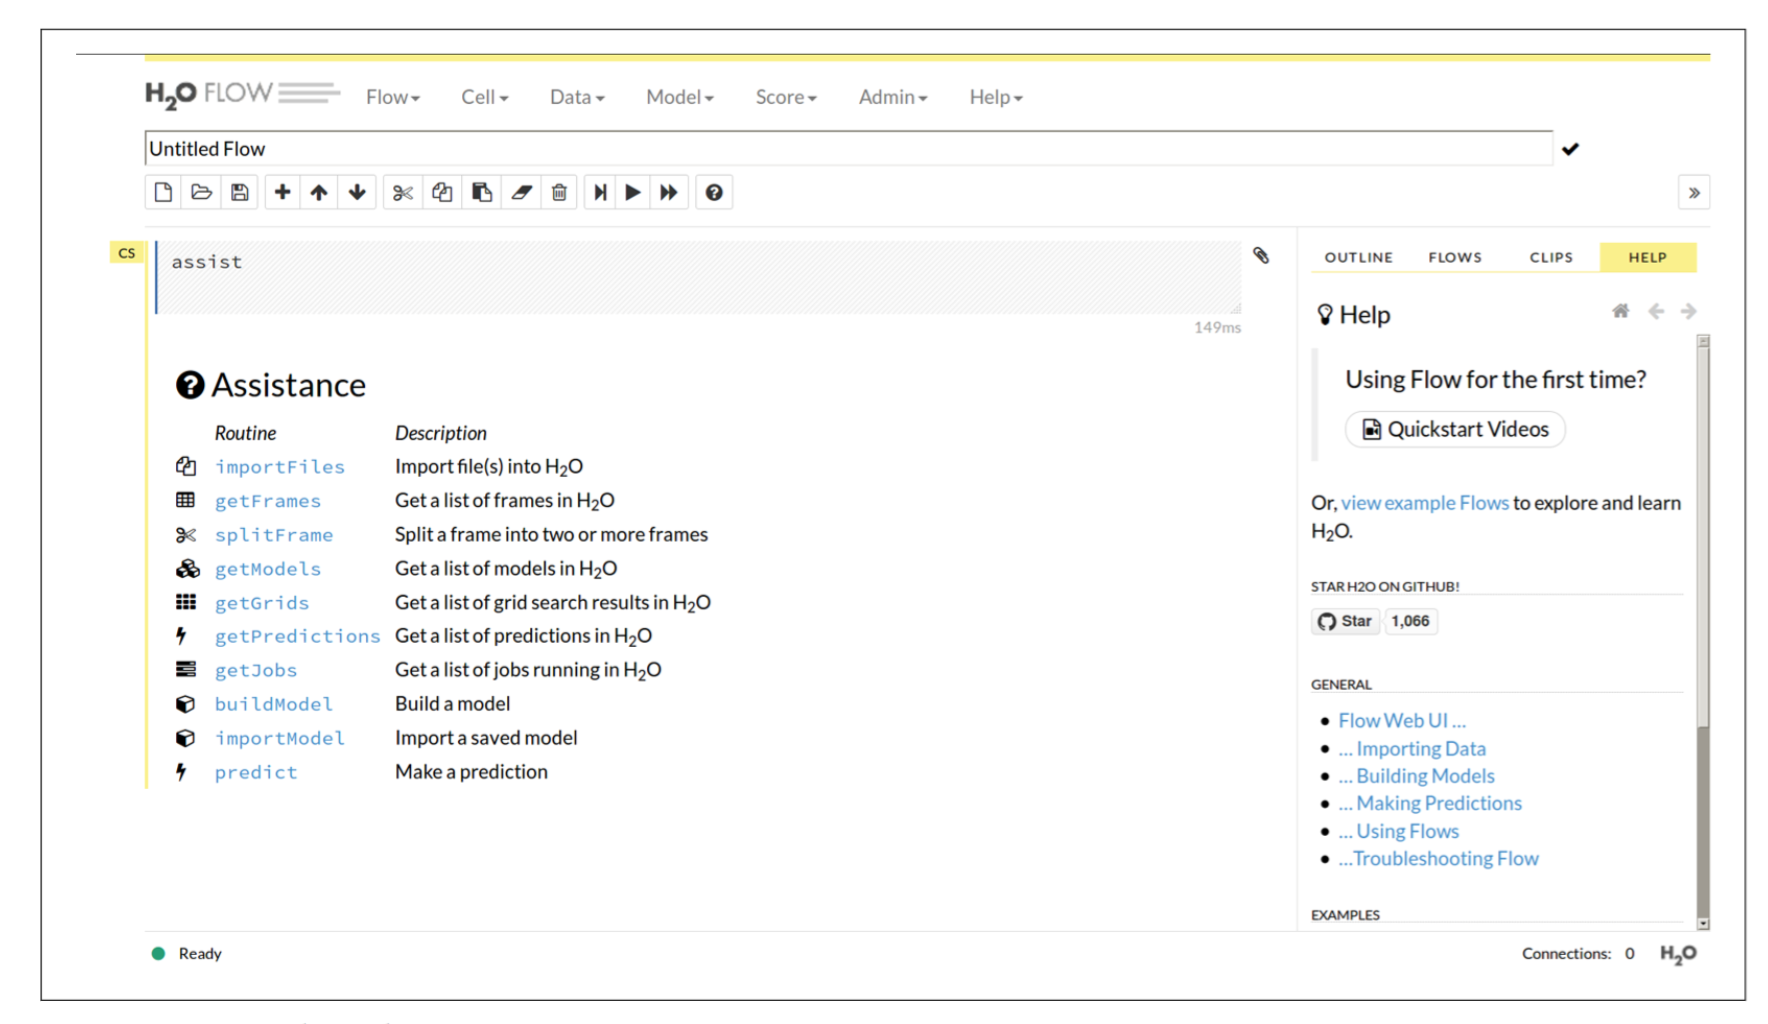

In [17]:
Image(filename='flow1.png')

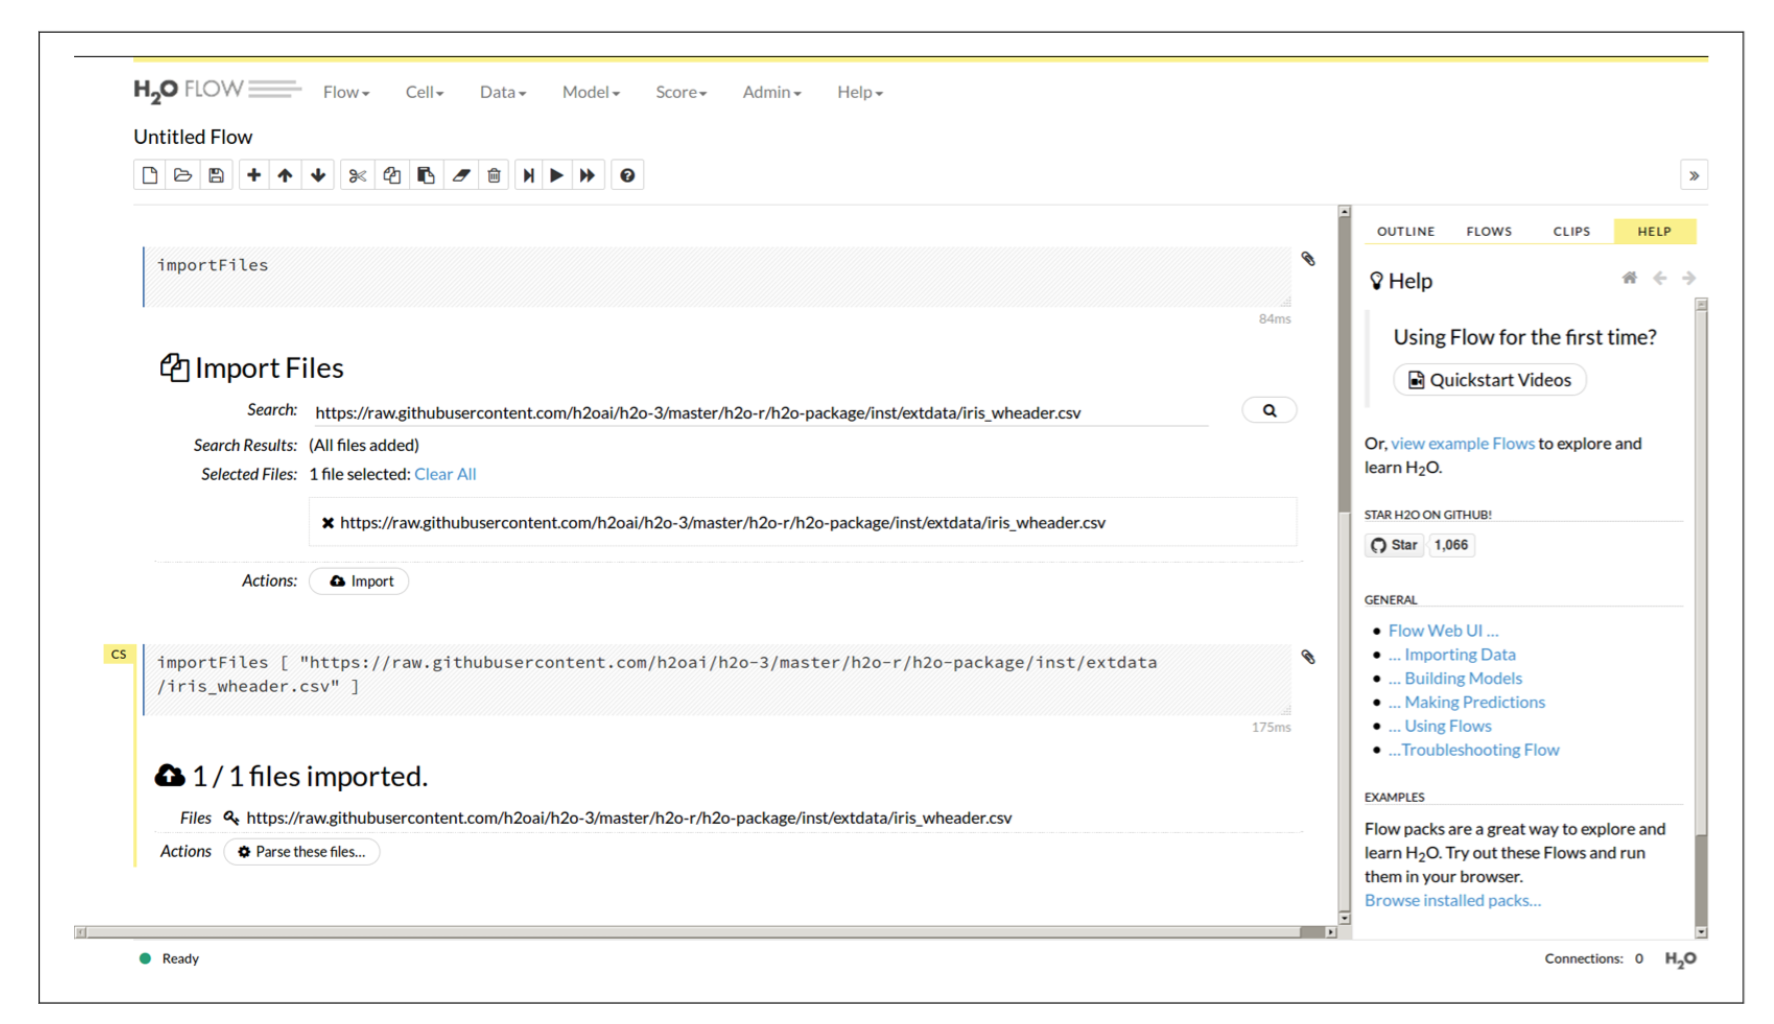

In [18]:
Image(filename='flow2.png')

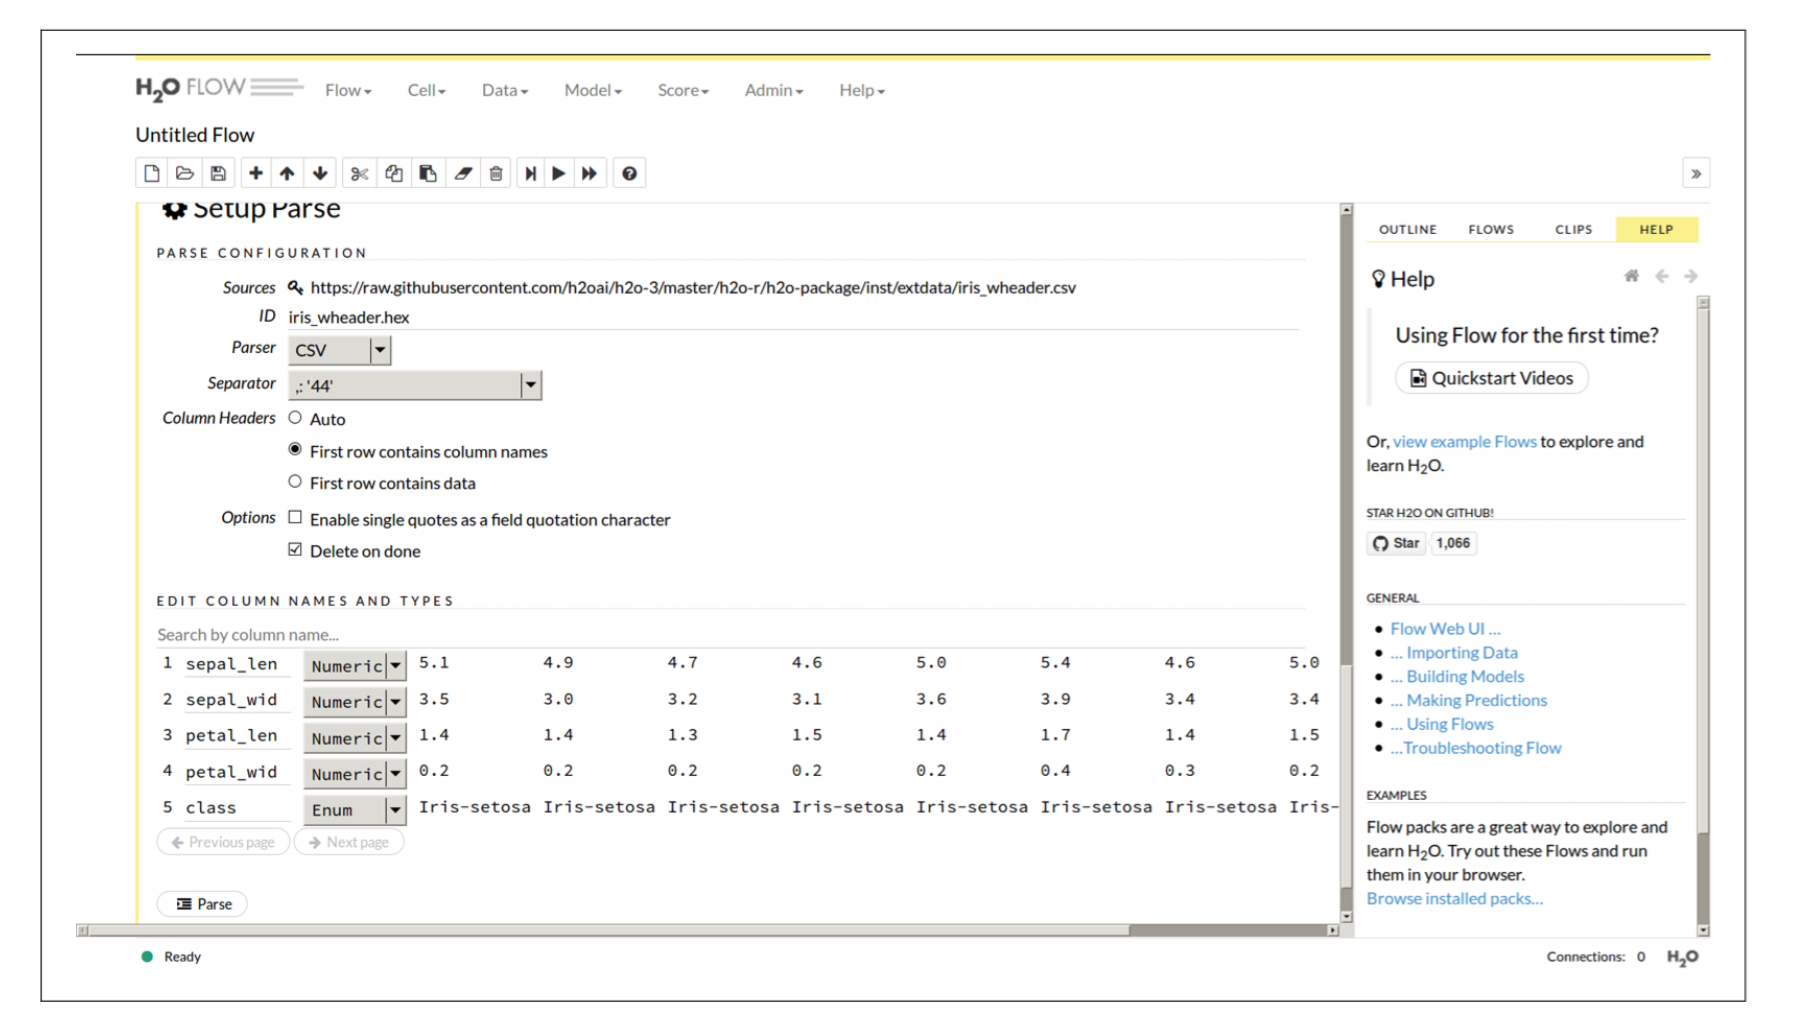

In [19]:
Image(filename='flow3.png')

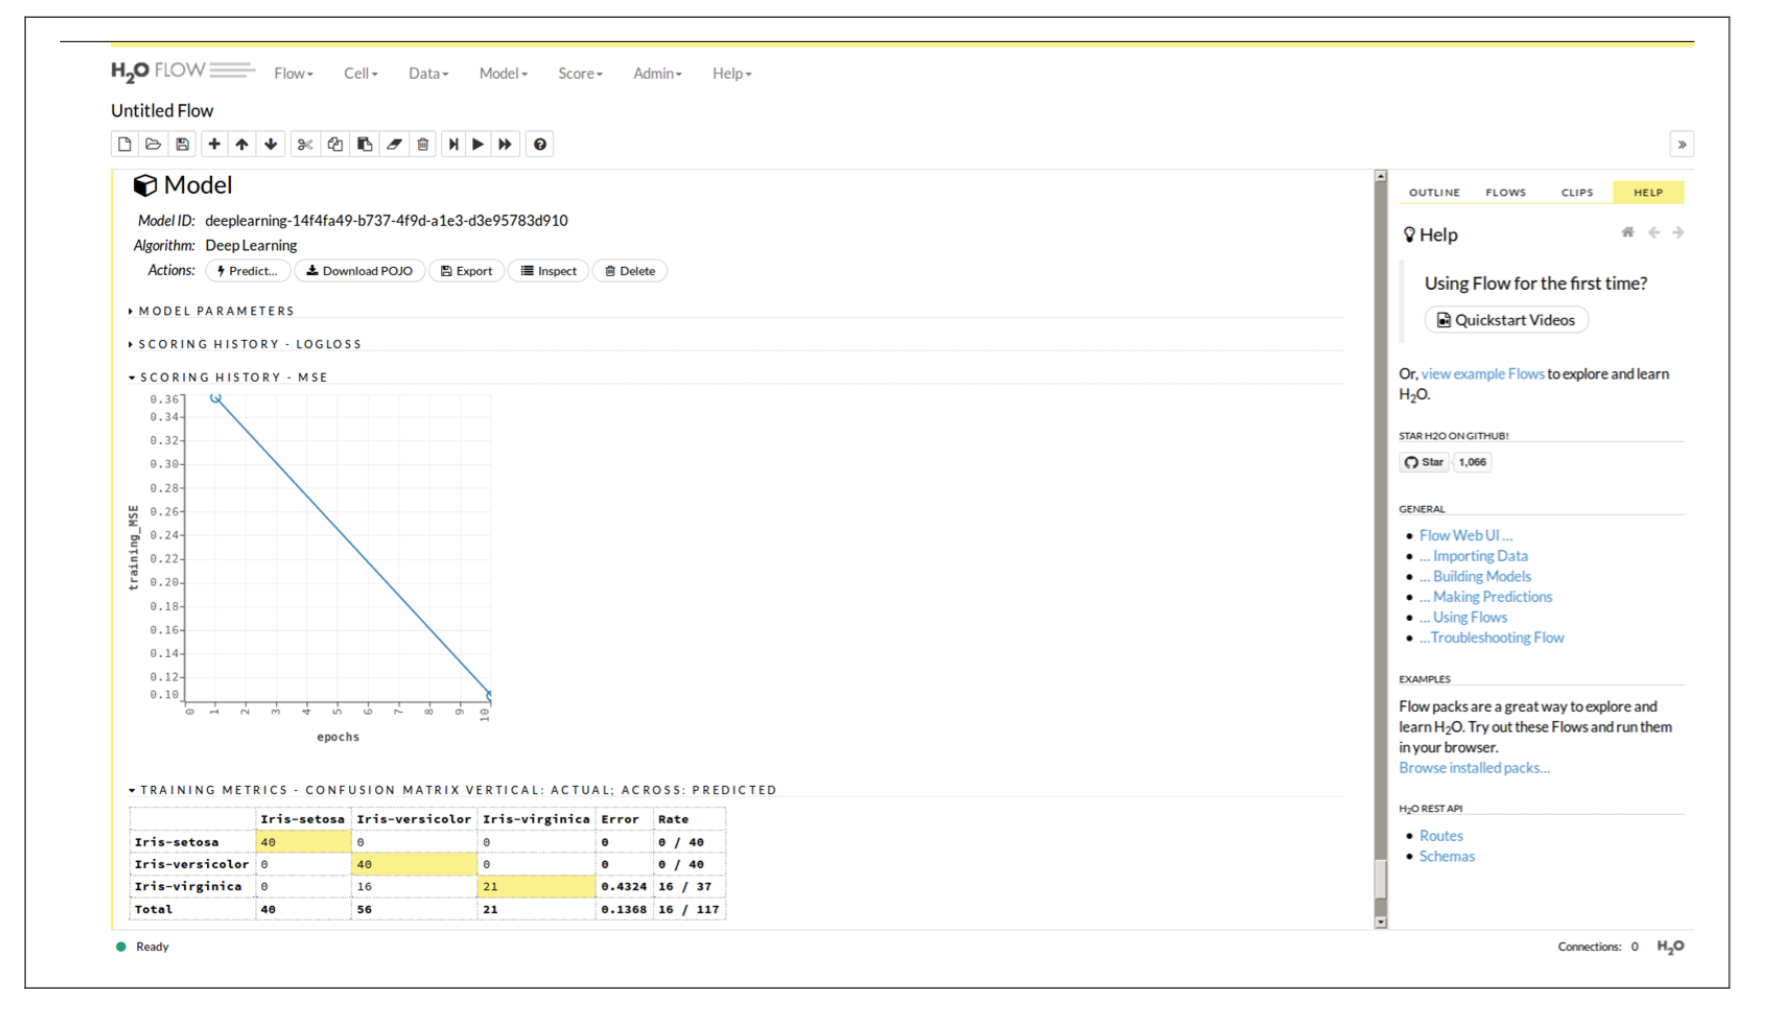

In [20]:
Image(filename='flow4.png')

In [21]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [22]:
glm_multi_v1 = H2OGeneralizedLinearEstimator(
                    model_id='glm_v1',            #allows us to easily locate this model in Flow
                    family='multinomial',
                    solver='L_BFGS')
glm_multi_v1.train(X,Y, training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [23]:
p = glm_multi_v1.predict(test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [24]:
glm_multi_v1.confusion_matrix(test)

Confusion Matrix: vertical: actual; across: predicted



Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
10.0,0.0,0.0,0.0,0 / 10
0.0,7.0,2.0,0.2222222,2 / 9
0.0,0.0,14.0,0.0,0 / 14
10.0,7.0,16.0,0.0606061,2 / 33


### Point to note : Since we are running this on the cluster after the prediction we get to see only the first 10 rows. 

In [25]:
data = p.as_data_frame()

In [26]:
data.head()

,predict,Iris-setosa,Iris-versicolor,Iris-virginica
0,Iris-setosa,0.999369,0.000631,1.493823e-16
1,Iris-setosa,0.998240,0.001760,1.548200e-15
2,Iris-setosa,0.999325,0.000675,1.164767e-15
3,Iris-setosa,0.997598,0.002402,4.245051e-15
4,Iris-setosa,0.994313,0.005687,4.120455e-17


##### We get nested loops when we dont use pandas

In [27]:
p.as_data_frame(use_pandas=False)[:3]

[['predict', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
 ['Iris-setosa',
  '0.9993691017965505',
  '6.308982034494322E-4',
  '1.4938228292430943E-16'],
 ['Iris-setosa',
  '0.9982397501944265',
  '0.0017602498055720014',
  '1.5482003397834637E-15']]

In [28]:
data1 = p['predict'].cbind(test["class"]).as_data_frame()

In [29]:
estimator.model_performance(test)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.0859719488494
RMSE: 0.293209735257
LogLoss: 0.290016172739
Mean Per-Class Error: 0.0952380952381
Confusion Matrix: vertical: actual; across: predicted



Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
10.0,0.0,0.0,0.0,0 / 10
0.0,9.0,0.0,0.0,0 / 9
0.0,4.0,10.0,0.2857143,4 / 14
10.0,13.0,10.0,0.1212121,4 / 33


Top-3 Hit Ratios: 


k,hit_ratio
1,0.8787879
2,1.0
3,1.0


### Using Flow 

Another advantage of using H2O is that it comes with its own web interface. Some features that can be achieved there are 

- View data you have uploaded through your client
- Upload data directly
- View models you have created through your client (and those currently being created!)
- Create models directly
- View predictions you have generated through your client
- Run predictions directly

__________________________

### Memory Useage. 

John Struggles to decide how much is enough? i.e How much memory is required to load the data run model and make predictions. 

H2O recommends four times the size of the data. As an example, you have 100 million rows, which is 5GB when zipped on disk, and maybe takes up 10GB in H2O’s memory (it is stored compressed, but not as tightly as a ZIP or GZIP file). So you need about 40GB of memory. If your cluster is made up of machines each with 16GB of memory, you should be looking at using three machines, though you might get away with two. 

__________________________

### Data Preparation

John now decides he has things set by his side. Now he wants to proceed with preparing the data and building models. Now he learns how to load data into H2O lets look at how he did so. Lets see how to get CSV files into H2O.

- df = h2o.import_file("hdfs://namenode/user/path/to/my.csv") 
- df = h2o.import_file("s3://<AWS_ACCESS_KEY>:<AWS_SECRET_KEY>@mybucket/my.csv")
- df = h2o.import_file("https://s3.amazonaws.com/mybucket/my.csv")

To learn so he considers the iris data set inthis case the data has no column names and type of the data is not specified. Lets see how he learnt to deal with this problem. 

In [30]:
h2o.import_file("h2o-bk/datasets/iris.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,C2,C3,C4,C5
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


In [31]:

data = h2o.import_file("h2o-bk/datasets/iris.csv",
      col_names=[
        "Sepal length", "Sepal width","Petal length", "Petal width", "Species"
        ],
      col_types=[
        "numeric", "numeric", "numeric", "numeric", "enum"
        ],destination_frame='iris_non_weader'
)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [32]:
data

Sepal length,Sepal width,Petal length,Petal width,Species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


### So John Understood how to read data but now there is a new trouble how does john get data into the cluster? 

He thinks hard and finds there are two ways lets explore these ways 

- Use the H2O data frame
- Use h2o.upload() function


John decides to test what he has learnt so far by creating his own data set. Lets see where he goes

In [33]:
 patients = {
      'height':[188, 157, 175],
      'age':[29, 33, 65],
      'risk':['A', 'B', 'B']
      }
df = h2o.H2OFrame(patients)

df.types

Parse progress: |█████████████████████████████████████████████████████████| 100%


{u'age': u'int', u'height': u'int', u'risk': u'enum'}

In [34]:
### Another way is to use the from_python function lets see how that works

df = h2o.H2OFrame.from_python(patients,column_types=['enum',None,None],destination_frame='patients')
df.types
df.frame_id ## THis confirms that the frame has been created 

Parse progress: |█████████████████████████████████████████████████████████| 100%


u'patients'

In [35]:
df

age,risk,height
29,A,188
33,B,157
65,B,175


Lets look at another advantage of H2O  
 
There are a lot of operations you can perform on your data, in situ on the remote H2O cluster, saving you having to download data, modify it, and then upload it again. When the data is too big to fit in your client machine, that can be a lifesaver.
Laziness, Naming, Deleting
There are two key concepts you need to know for successful H2O data manipulation:
- Every change you make involves a data copy. That means the frame name will change, too.
- A lot of operations are lazy, meaning the requested change is recorded, but is not carried out until it has to be.

In [36]:
df1 = h2o.import_file('h2o-bk/datasets/iris_wheader.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [37]:


print(df1.frame_id) #iris_wheader.hex
df1 = df1[:,1:] #Drop column 0. Keep column 1 onwards. data.frame_id #py_2_sid_88fe ## Here let the students answer whats happening when compared to pandas
df1 = h2o.assign(df1, "iris") 
print(df1.frame_id) #iris
h2o.ls() #iris and iris_wheader.hex, no py_2_sid_88fe 
h2o.remove("iris_wheader.hex")
h2o.ls() #Just lists iris

iris_wheader1.hex
iris


,key
0,DeepLearning_model_python_1509447880443_1
1,Key_Frame__upload_be2829b27794b88888a58bedb86d...
2,_bf8958cee1999b1f68815a9d689e4833
3,glm_v1
4,iris
5,iris.hex
6,iris_non_weader
7,iris_wheader1.hex
8,modelmetrics_DeepLearning_model_python_1509447...
9,modelmetrics_DeepLearning_model_python_1509447...


In [38]:
#h2o.remove_all()

### Other operations are very similar to what is done in pandas. Lets take a look at a few of them

In [39]:
df1["petal_len"] = df1["petal_len"] * 1.2
df1["ratio"] = df1["petal_wid"] / df1["sepal_wid"]
df1

sepal_wid,petal_len,petal_wid,class,ratio
3.5,1.68,0.2,Iris-setosa,0.0571429
3,1.68,0.2,Iris-setosa,0.0666667
3.2,1.56,0.2,Iris-setosa,0.0625
3.1,1.8,0.2,Iris-setosa,0.0645161
3.6,1.68,0.2,Iris-setosa,0.0555556
3.9,2.04,0.4,Iris-setosa,0.102564
3.4,1.68,0.3,Iris-setosa,0.0882353
3.4,1.8,0.2,Iris-setosa,0.0588235
2.9,1.68,0.2,Iris-setosa,0.0689655
3.1,1.8,0.1,Iris-setosa,0.0322581


In [40]:
print('standard deviation fo the feature petal len {sd}'.format(sd=df1["petal_len"].sd()))

print('corelation between petal length and ratio {cor}'.format(cor=df1['petal_len'].cor(df1['ratio'])))


standard deviation fo the feature petal len [2.1173045039427154]
corelation between petal length and ratio 0.955778590429



The next example creates a new numeric column that is 1 when the petal length is greater than average, and 0 everywhere else. The syntax is something that evaluates to a boolean, followed by ifelse(if_true, if_false):



In [41]:
df1["islong"] = (df1["petal_len"] > df1["petal_len"].mean()[0]).ifelse(1,0)

In [42]:
df1

sepal_wid,petal_len,petal_wid,class,ratio,islong
3.5,1.68,0.2,Iris-setosa,0.0571429,0
3,1.68,0.2,Iris-setosa,0.0666667,0
3.2,1.56,0.2,Iris-setosa,0.0625,0
3.1,1.8,0.2,Iris-setosa,0.0645161,0
3.6,1.68,0.2,Iris-setosa,0.0555556,0
3.9,2.04,0.4,Iris-setosa,0.102564,0
3.4,1.68,0.3,Iris-setosa,0.0882353,0
3.4,1.8,0.2,Iris-setosa,0.0588235,0
2.9,1.68,0.2,Iris-setosa,0.0689655,0
3.1,1.8,0.1,Iris-setosa,0.0322581,0


### So far John understood how to import data and manipulate the data in the H2O cluster. Now he thinks what could he possibly save on his PC ( Client PC) ?

- Frames
  - Could be data previously modified
  - predictions made from a particular model
- Models
  - Models can be imported in binary format to be re-imported later
  - Models can be saved in POJO (Plain Old Java Objects) to be used without H2O

### Point to notice

The frame sizes reported by H2O are compressed sizes. But the exported files will be uncompressed.

In [43]:
h2o.ls()

,key
0,DeepLearning_model_python_1509447880443_1
1,Key_Frame__upload_be2829b27794b88888a58bedb86d...
2,_bf8958cee1999b1f68815a9d689e4833
3,glm_v1
4,iris
5,iris.hex
6,iris_non_weader
7,iris_wheader1.hex
8,modelmetrics_DeepLearning_model_python_1509447...
9,modelmetrics_DeepLearning_model_python_1509447...


In [44]:
df = h2o.get_frame('patients')
h2o.download_csv(df,"data_test.csv") 

### Data can be downloaded from other sources.
For saving to a location on the H2O server, use h2o.exportFile() (h2o.export_file() in Python), where the first parameter is the frame to save, and the second is the disk path and filename. To save to HDFS use an “hdfs://” prefix, and to save to s3, use an “s3://” prefix (or try the older “s3n://” if you have problems). As with importing, you can also specify your AWS credentials 

- h2o.exportFile(d, "/path/to/d.csv")
- h2o.exportFile(d, "s3://mybucket/d.csv")
- h2o.exportFile(d, "s3://<AWS_ACCESS_KEY>:<AWS_SECRET_KEY>@mybucket/d.csv")
- h2o.exportFile(d, "hdfs://namenode/path/to/d.csv")

### Things learnt upto now.

### With the skills by his side John now uses them with the football data set. 

#### Lets follow him to see what he does with it

Since John has been working with predicting the sales price of houses he is now keen to know 
- How much does it cost to heat your house? Or to cool it in summer? 
- Does an extra window make a difference? 
- Is a multi floor building with a small roof cheaper to heat than a bungalow of the same floor area? Maybe you guessed yes and yes, but by how much?

This will be a regression problem, on a relatively small data set. We have 768 samples, with eight features, and a choice of two responses (heating load, cooling load) to learn. 
______________________________


In [45]:

data = h2o.import_file('h2o-bk/datasets/ENB2012_data.csv')
factorsList = ["X6", "X8"]
data[factorsList] = data[factorsList].asfactor()
train, test = data.split_frame([0.8],seed=999)
x = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]
y = "Y2" #Or "Y1"

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [46]:
data.head()

X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0.98,514.5,294,110.25,7,2,0,0,15.55,21.33
0.98,514.5,294,110.25,7,3,0,0,15.55,21.33
0.98,514.5,294,110.25,7,4,0,0,15.55,21.33
0.98,514.5,294,110.25,7,5,0,0,15.55,21.33
0.9,563.5,318.5,122.5,7,2,0,0,20.84,28.28
0.9,563.5,318.5,122.5,7,3,0,0,21.46,25.38
0.9,563.5,318.5,122.5,7,4,0,0,20.71,25.16
0.9,563.5,318.5,122.5,7,5,0,0,19.68,29.6
0.86,588,294,147,7,2,0,0,19.5,27.3
0.86,588,294,147,7,3,0,0,19.95,21.97


#### Lets now look at the features of the data

| Features       | what they are?  |
| :------------- |:-------------:|
| X1     |  Relative Compactness  | 
| X2    | Surface Area     |  
| X3 | Wall Area      |
|X4  |Roof Area       |
|X5  |Overall Height  |
|X6  | Orientation    |
|X7  | Glazing Area   |
|X8  | Glazing Area Distribution | 
|Y1  | Heating Load             |
|Y2  | Cooling Load              | 

Lets look at the meaning of a few terms
____________
What about the meanings for X6, “orientation”? John can see the values range from 2 to 5. This is the rotation of the building shape. The paper is not explicit, but John guessesg:
-  2: North 
-  3: East
-  4: South
-  5: West
_______
Then the other categorical, X8, describes how the windows are distributed:
-  0: No windows
- 1: Uniform, 25% on each side
-  2: 55% on North side, 15% on other sides
-  3: 55% on East side, 15% on other sides
-  4: 55% on South side, 15% on other sides
-  5: 55% on West side, 15% on other sides

Also, X7 (“Glazing area”) is how big the windows are, expressed as a percentage of floor area, but there are only three values used: 10%, 25%, 40%. 0% is also used, for when X8 is zero, giving us a total of four values. As another example, there are only two building heights (X5): 3.5m and 7m. That is, single-story or two- story buildings.


In [47]:
train.describe()

Rows:625
Cols:10




,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
type,real,real,real,real,real,enum,real,enum,real,real
mins,0.62,514.5,245.0,110.25,3.5,0.0,0.0,0.0,6.04,10.9
mean,0.760992,674.2008,319.3624,177.4192,5.2192,NaN,0.23616,NaN,22.218176,24.4976
maxs,0.98,808.5,416.5,220.5,7.0,3.0,0.4,5.0,43.1,48.03
sigma,0.104651320939,87.4497158592,44.6793089839,45.0949771316,1.75113040414,NaN,0.1328483809,NaN,10.1449861085,9.57297091374
zeros,0,0,0,0,0,165,37,37,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


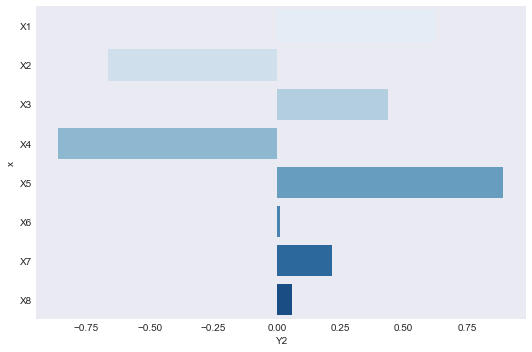

In [48]:
res = train[x].cor(train[y]).as_data_frame()
res['x'] = x
sns.factorplot(x='Y2',y='x',data=res,kind='bar',palette='Blues',size=5,aspect=1.5)


In [49]:
m = h2o.estimators.H2ORandomForestEstimator(model_id="RF_defaults", nfolds=10)
m.train(x, y, train)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [50]:
m.scoring_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2017-10-31 16:34:58,4.922 sec,0.0,NaN,NaN,NaN
1,,2017-10-31 16:34:58,4.946 sec,1.0,2.137911,1.377091,4.570662
2,,2017-10-31 16:34:58,4.957 sec,2.0,2.076415,1.317784,4.311498
3,,2017-10-31 16:34:58,4.968 sec,3.0,2.166329,1.437009,4.692980
4,,2017-10-31 16:34:58,4.979 sec,4.0,2.154327,1.471071,4.641126
5,,2017-10-31 16:34:58,4.989 sec,5.0,2.174152,1.474833,4.726935
6,,2017-10-31 16:34:58,4.997 sec,6.0,2.127002,1.418807,4.524136
7,,2017-10-31 16:34:58,5.008 sec,7.0,2.064953,1.371053,4.264029
8,,2017-10-31 16:34:58,5.016 sec,8.0,2.045429,1.356434,4.183778
9,,2017-10-31 16:34:58,5.023 sec,9.0,2.028912,1.383814,4.116485


In [51]:
m.model_performance(test)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 3.74246789711
RMSE: 1.93454591497
MAE: 1.36636558399
RMSLE: 0.0591318555578
Mean Residual Deviance: 3.74246789711


John now looks at the data and tries to understand the result. He finds, square root of MSE (RMSE here) is in real-world units, kWh/(m2yr)—i.e., kilowatt- hours, per square meter of floorspace, per year—so just a reminder that we were trying to predict Y2, the required cooling load. The range on Y2 is from 10.90 to 48.03. The RMSE of 1.90 is not too bad. But as we know from yeaterday that Random Forests perform better with tuning. John decides to tune the hyper parameters. Lets look at some of the parameters. More details can be found in the [documentation](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science.html) which is extensive
_________

|parameters|  what thy are                                        |
|:-------- |:----------                                           |
|ntrees    |How many trees in your forest.                        |
|max_depth |How deep is the tree allowed to grow                  | 
|mtries    |This is how many variables to randomly                |
|          | choose as candidates at each split.                  | 
|min_rows  |number of rows training data required 
|          |to make the leaf node                                 |

In [52]:
import h2o.grid
params={
        "ntrees": [50, 100, 120],
        "max_depth": [40, 60],
        "min_rows": [1, 2,3,4]
        }
g = h2o.grid.H2OGridSearch(
h2o.estimators.H2ORandomForestEstimator(nfolds=10),hyper_params=params)
g.train(x, y, train)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


#### Technical Point.

John observes that table is ordered from best to worst: lower residual deviance (equivalent to MSE here) is what we are after. Though the range of values looks narrow, we’ve actually learned a lot from this.

In [53]:
best_params = pd.DataFrame(g.sorted_metric_table())

In [54]:
best_params[:1][['max_depth','min_rows','ntrees']]

,max_depth,min_rows,ntrees
0,60,2.0,100


In [55]:
model = h2o.estimators.H2ORandomForestEstimator(nfolds=10,max_depth=60,min_rows=2,ntrees=50)
model.train(x,y,train)
model.predict(test)

drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


predict
27.1538
27.791
24.6493
24.8042
35.3123
35.4159
32.3075
12.3605
12.2122
12.6642


### Sparkling Water

The Sparkling Water project combines H2O machine-learning algorithms with the execution power of Apache Spark. This means that the project is heavily dependent on two of the fastest growing machine-learning open source projects out there. Its nearing one year anniversary. [example](https://github.com/h2oai/sparkling-water/tree/master/examples)


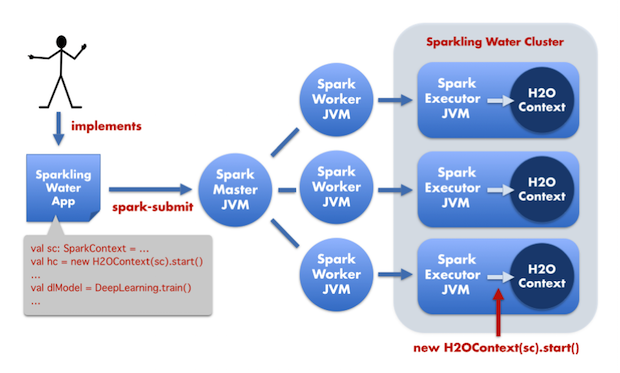

In [56]:
Image('sparkling-water-f1.png')

### Terminology

##### DRIVER
The driver is the process where the main method runs. First it converts the user program into tasks and after that it schedules the tasks on the executors.

##### EXECUTORS

Executors are worker nodes' processes in charge of running individual tasks in a given Spark job. They are launched at the beginning of a Spark application and typically run for the entire lifetime of an application. Once they have run the task they send the results to the driver. 

#### APPLICATION EXECUTION FLOW

With this in mind, when you submit an application to the cluster with spark-submit this is what happens internally:

1. A standalone application starts and instantiates a SparkContext instance (and it is only then when you can call the application a driver).
2. The driver program ask for resources to the cluster manager to launch executors.
3. The cluster manager launches executors.
4. The driver process runs through the user application. Depending on the actions and transformations over RDDs task are sent to executors.
5. Executors run the tasks and save the results.
6. If any worker crashes, its tasks will be sent to different executors to be processed again. In the book "Learning Spark: Lightning-Fast Big Data Analysis" they talk about Spark and Fault Tolerance:

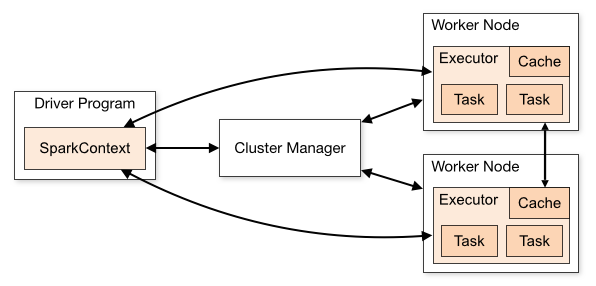

In [57]:
Image('spark.png')

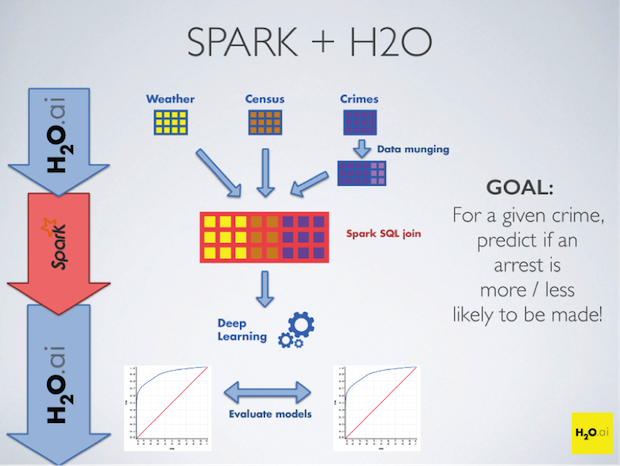

In [58]:
Image('sparkling-water-f3.png')



### Recap
______________
- The need to have other tools to deal with large data.
- Tools to Build Machine learning at scale.
- Introduction to H2O
- Handling data and building models in H2O
- Introduction to Sparkling Water.
- Hands on with H2O


### Thank You
______________

For more queries - Reach out to academics@greyatom.com